In [1]:
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Generates Random Data to test the linear regression
X,y,W = datasets.make_regression(n_samples=100,n_features=1,n_informative=1,noise=10,coef=True)


In [3]:
#we can check the  number fo dimensions and the shape of the numpy arrays
print "dimmensions:"+str(X.ndim)
print "shape:"+str(X.shape)
print "W =%s" % W

dimmensions:2
shape:(100, 1)
W =55.2544889959


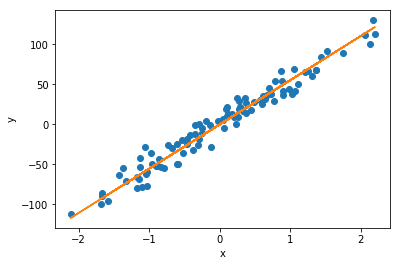

In [4]:
# the make_regression function from sklearn  returned in W, the theta params of the linear regression so we can the
# multiply the W vector (array) with the X matrix to obtain the values to create a trend line on the data (regression)
z = X*W
# we can visualize what the randomly generated dataset looks-like
plt.plot(X,y,'o')
plt.plot(X,z)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
W_ = np.zeros(X.shape[1])


(100,)

In [ ]:
# compute the cost
def cost(X,y,theta):
    y_hat_ = X.dot(theta)
    sqDiff = (y.flatten()-y_hat_)**2
    s = sqDiff.sum() * (0.5)
    return s

def linearRegWithStep(X,y,W,alpha,num_iters):
    
    for i in range(num_iters):
        y_hat = X.dot(W)
        diff = y_hat.flatten()-y
        
        for w_i in range(W.size):
            errors_x_i = diff * X[:,w_i].flatten()
            W[w_i][0] = W[w_i][0]-alpha * errors_x_i.sum()
    
    
        #S = cost(X,y,W)
        #print "iteration ", i, "S(W)=",S

#        if i%10 == 0:
#            plt.plot(X,y,'o')
#            plt.plot(X,W*X,'r')
#            plt.title("Iteration i = "+str(i))
#            plt.show()
        
    return W
            
            
        
    
    
    

In [ ]:
w = np.zeros((X.shape[1],1))
alpha = 0.01
num_iters = 1500

w = linearRegWithStep(X,y,w,alpha,num_iters)
print w

plt.plot(X,y,'o')
plt.plot(X,X*w,'r')
plt.plot(X,X*W,'g')
plt.show()

In [161]:
def costFunction(X,y,theta):
    y_hat_ = X.dot(theta)
    sqDiff = (y.flatten()-y_hat_)**2
    s = sqDiff.sum() * (0.5)
    return s

def gradient_descent(X, y, beta, alpha, iterations):
    """
    gradient_descent() performs gradient descent to learn beta by
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = []

    for iteration in range(iterations):
        hypothesis = X.dot(beta)
        loss = hypothesis-y
        # the transpose in this case is the same as doing flatten
        # wha we want to do is to make the shape of X and gradient
        # the same so we can multiply them and sum them
        gradient = X.T.dot(loss)/len(y)
        beta = beta - alpha*gradient
        cost = costFunction(X, y, beta)
        cost_history.append(cost)
        

#        if iteration%10 == 0:
#            plt.plot(X,y,'o')
#            plt.plot(X,X*beta,'r')
#            plt.plot(X,X*W,'g')
#            plt.show()            

    return beta, cost_history



def gradient_descent_converg(X, y, beta, alpha, iterations):
    """
    gradient_descent() performs gradient descent to learn beta by
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = []
    error_history = []
    go = True
    iteration = 0
    
    while go:
    #for iteration in range(iterations):
        hypothesis = X.dot(beta)
        loss = hypothesis-y
        # the transpose in this case is the same as doing flatten
        # wha we want to do is to make the shape of X and gradient
        # the same so we can multiply them and sum them        
        gradient = X.T.dot(loss)/len(y)
        beta = beta - alpha*gradient
        cost = costFunction(X, y, beta)
        cost_history.append(cost)
        
        if iteration > 0:
            error_history.append(abs(error_history[iteration-1]-cost))
            # check if hte error is small enough or we exceeded the  iteration limit
            if (error_history[-1] < 0.001) or (iteration > iterations):                
                go = False
        else:
            error_history.append(cost)
            
        iteration+=1
    return beta, cost_history, error_history, iteration


In [162]:
w = np.array([0])
a = 0.01
iters = 1500

#(b, c) = gradient_descent(X, y, w, a, iters)
#----------------------------------------------------
#b <--has the weights
#c <-- list with the cost history
#d <-- list with the error history
#e <-- iterations did until convergence
#----------------------------------------------------
(b,c,d,e) = gradient_descent_converg(X, y, w, a, iters)
#----------------------------------------------------

#plt.plot(X,y,'o')
#plt.plot(X,X*b,'r')
#plt.plot(X,X*W,'g')
#plt.show()

In [165]:
print b
print d[-1]
print e

[ 8.87124997]
1.79298185685e-05
96


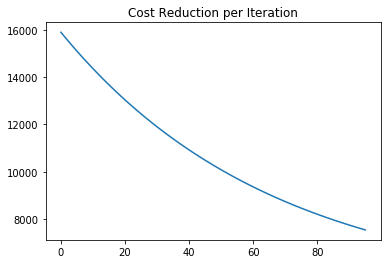

In [168]:
plt.plot(c)
plt.title('Cost Reduction per Iteration')
plt.show()